In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("/content/NFLX.csv")
df



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


In [6]:

df.shape


(3119, 7)

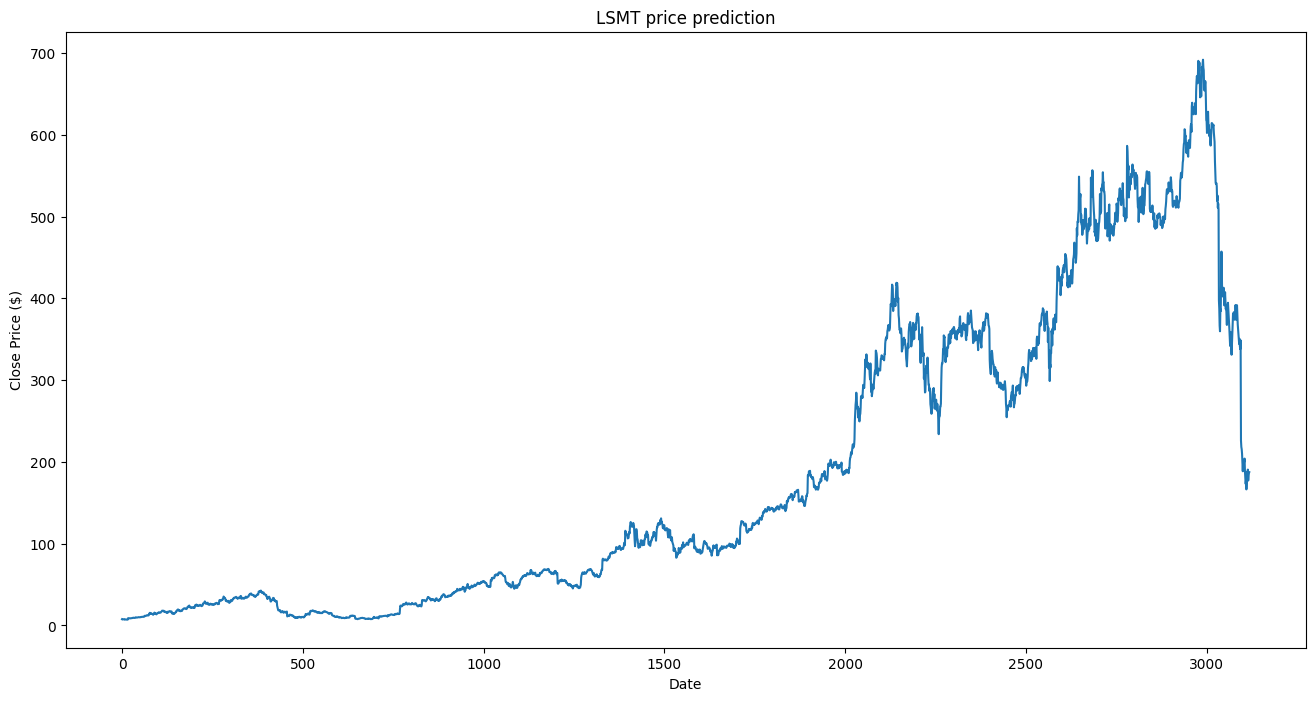

In [7]:
plt.figure(figsize=(16,8))
plt.title('LSMT price prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(df["Close"])
plt.show()



In [8]:
data=df.filter(['Close'])
dataset=data.values

In [9]:
training_data_len =math.ceil(len(dataset)*0.8)
training_data_len

2496

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.00090763],
       [0.00049659],
       [0.00087425],
       ...,
       [0.25773154],
       [0.26192335],
       [0.26351535]])

In [11]:
train_data=scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00090763, 0.00049659, 0.00087425, 0.00068229, 0.00087007,
       0.00085547, 0.00067603, 0.00100778, 0.00038809, 0.00037974,
       0.00043191, 0.00044025, 0.00042982, 0.00036723, 0.        ,
       0.00017109, 0.00038392, 0.00290233, 0.0027375 , 0.00248294,
       0.00265404, 0.0026749 , 0.00233897, 0.0024433 , 0.00245582,
       0.00271246, 0.00257892, 0.0029691 , 0.00293154, 0.00328208,
       0.00320905, 0.0035408 , 0.00365556, 0.00336762, 0.00317566,
       0.00324661, 0.00343856, 0.00353037, 0.00429194, 0.00414172,
       0.00384335, 0.00393932, 0.00386421, 0.00407912, 0.00434202,
       0.00462161, 0.00460283, 0.00435037, 0.00427108, 0.00448599,
       0.0045465 , 0.00446721, 0.00444843, 0.00495754, 0.00497215,
       0.00484904, 0.00509316, 0.00525174, 0.00516828, 0.00541031])]
[0.005134893674276881]



In [12]:

x_train,y_train=np.array(x_train),np.array(y_train)

In [13]:
x_train =np.reshape(x_train, newshape= (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2436, 60, 1)

In [14]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:

model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:


model.fit(x_train, y_train, epochs=1, batch_size=1)

2436/2436 [==============================] - 71s 27ms/step - loss: 6.2744e-04


In [17]:
test_data =scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:

x_test =np.array(x_test)

In [19]:
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [20]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 2s 29ms/step


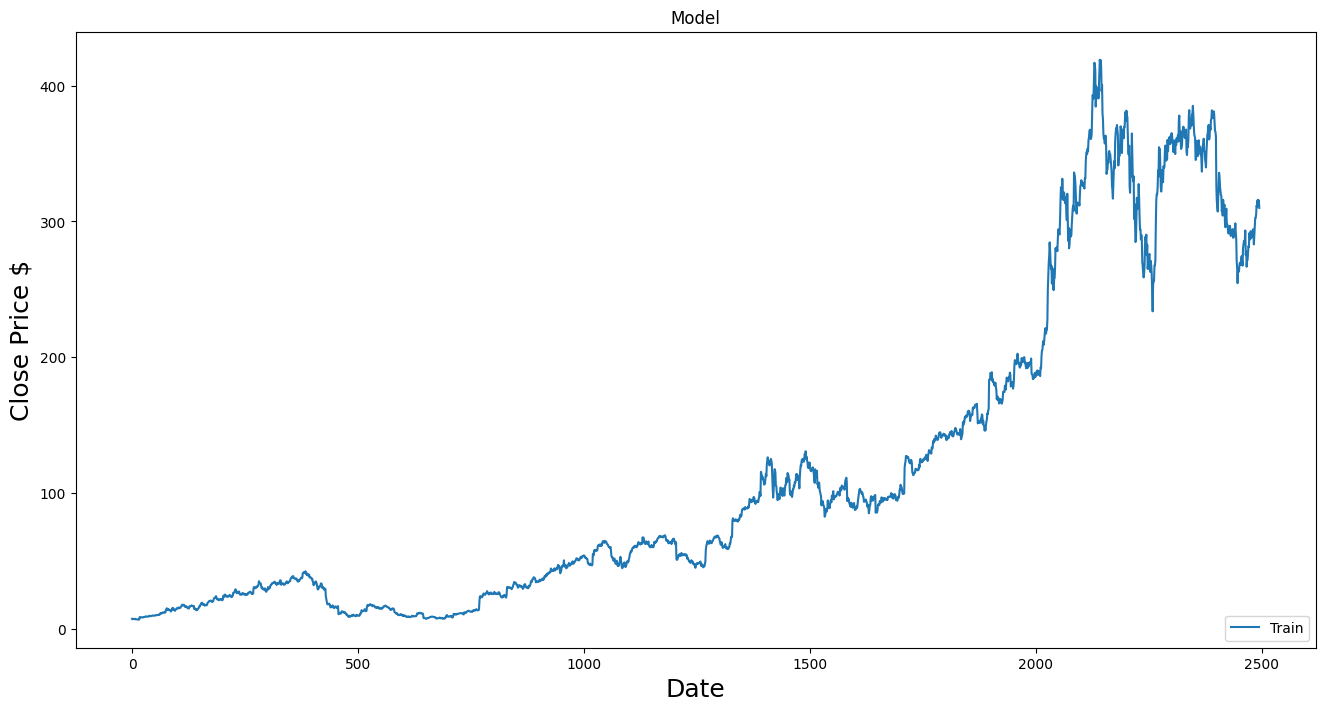

In [21]:

train=data[:training_data_len]
valid=data[training_data_len:]

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()